## K-nearest Neighbors (kNN)

**kNN find a predefined number of training samples closest in distance to the new point, and predict the label from these. Let say we have 2 classes 'a' and 'b' on the scatter plot, the kNN algorithm determine a new point 'c' is either 'a' or 'b' by assess if the 'c' has closest similarity to the features of 'a' and 'b'. So given k=3 and c, the algorithm finds 3 closest data points that closest to 'c'. So out of 3 closest data points to 'c', if two of them are class 'a' then class 'a' is the majority. so new data point will be belong to 'a'.**

kNN is lazy learning algorithm because it does not attempt to construct a general internal model, but simply stores instances of the training data. Namely, it simply stored and remember the training dataset, then look at the similarity test data and training data set records in order to calculate the class of test data.
 

Advantages:
- Fast and easy to implement due to it's simplicity


Disadvantages:


In [1]:
import random

def makeTerrainData(n_points=1000):
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]
    
    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [12]:
def classifykNN(features_train, labels_train):   
    ### import the sklearn module for Decision Tree
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=4,weights='distance')
    clf.fit(features_train, labels_train)
    return clf

In [3]:
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

import base64
import json
import subprocess

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    %matplotlib inline
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    
def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start, json.dumps(data), image_end)

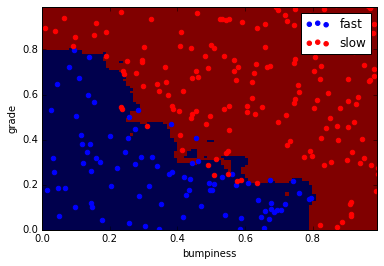

In [13]:
# MAIN

"""Use sklearn k-Nearest Neighbors (kNN) classifier to classify the terrain data.
   Objective of this exercise is to recreate the decision boundary found in the lesson video, and make a plot that
   visually shows the decision boundary """ 
features_train, labels_train, features_test, labels_test = makeTerrainData()

# the training data (features_train, labels_train) have both "fast" and "slow" points mixed
# in together--separate them so we can give them different colors in the scatterplot,
# and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

clf = classifykNN(features_train, labels_train)

# draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)

In [14]:
# Calculating Decision Tree accuracy
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
print("{0}%".format(accuracy_score(labels_test, pred)*100))

94.0%
